This is an example .ipynb notebook of the simulations of the FTS. Included are the packages used, .py files that contain the functions, as well as a few of the functions used, and the data displayed. 4/21/19 Mira Liu

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import *
from PossiblePaths import *
from BackgroundValues import *
from random import uniform
import random
import matplotlib
import pickle
import math 
import time #to save figs automatically time.strftime("%Y_%m_%d_%s")
#%matplotlib auto

# Runs n rays independently, each ray representing a single photon travelling eight paths. Each photon given random phase, and power is summed per ray independently.

In [6]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
Lamd = 3.32 #wavelength (in mm)
Nsize = Nsized(Lamd)
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global focal point and center axis

thetG = [0,0,0] #central axis
n=1
Delay,Ij,Numbers = RunNRays_NoPix(Lamd,Nsize,spo,n) #runs n rays independently
print('CURRENTLY RUNNING...')

#with open("Name"+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Name"+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
    
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

began:  2019-04-21 21:42:07
CURRENTLY RUNNING...
COMPLETED
total time: ~ 0.4762706955273946 mins


# Plotting the number of rays that reach the detector as a function of mirror position.

See MultiRayModulating for original

In [25]:
''' Number of rays that reach detector as a function of mirror location '''
def Part2(Lamd,Nsize,spo): 
    n = 100
    r = 5 #CHANGED FORM 0 TO 5 TO TEST IF THIS IS SOURCE OF DIFFERENCE
    thetG = [0,0,0]
    Rays = makerays(spo,thetG,r,n) 
    N=[]
    Number = [] #number of rays that hit detector as function of mirror position (y)
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each if n =1
        N.append(len(OutRays))
    return N

In [26]:
N2=Part2(Lamd,Nsize,spo)

In [27]:
with open("100_rays_geom_mod_r=5"+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    pickle.dump(N2,f)
    

### is the difference below due to number, source, geometry of simulation, bug...

#### I ran the original code again, and got something similar to the one I am getting now... despite the original output being different.

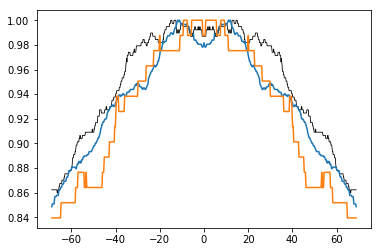

In [28]:
N1 = np.array(N)
N21 = np.array(N2)
with open( 'MultiRaySimulation/IjModulate_2018_07_14_09_17_39.pkl' , 'rb') as file1:
    Ij=pickle.load(file1, encoding = 'latin1')
Ij = np.array(Ij)
with open( 'MultiRaySimulation/DelayModulate_2018_07_14_09_17_39.pkl' , 'rb') as file1:
    Delay=pickle.load(file1, encoding = 'latin1')
    
    
pl.plot(Delay,Ij/max(Ij),linewidth = .8, color = 'black',label = 'Beam Loss')
Delay2 = np.linspace(min(Delay),max(Delay),len(N1))
pl.plot(Delay2,N/N1.max())
pl.plot(Delay2,N2/N21.max())
pl.show()